In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import time
import gym
from gym import wrappers
env = gym.make('CartPole-v0') # Create environment

def show_replay():
    """
    Not-so-elegant way to display the MP4 file generated by the Monitor wrapper inside a notebook.
    The Monitor wrapper dumps the replay to a local file that we then display as a HTML video object.
    """
    import io
    import base64
    from IPython.display import HTML
    video = io.open('./gym-results/openaigym.video.%s.video000000.mp4' % env.file_infix, 'r+b').read()
    encoded = base64.b64encode(video)
    return HTML(data='''
        <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
    .format(encoded.decode('ascii')))

In [8]:
# brug inden 
env = wrappers.Monitor(env, "./gym-results", force=True) # Create wrapper to display environment
s = env.reset()

# Brug efter
env.close()
show_replay()

ERROR: VideoRecorder encoder exited with status 1


In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Agent(nn.Module): 
    
    def __init__(self): 
        super(Agent, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(4, 20),
            nn.Linear(20, 20), 
            nn.Linear(20, 20), 
            nn.ReLU(),
            nn.Linear(20, 2)
        )        
        
    def forward(self, data): 
        x = self.layers(data)
        return F.softmax(x, dim=1)
    
model = Agent()

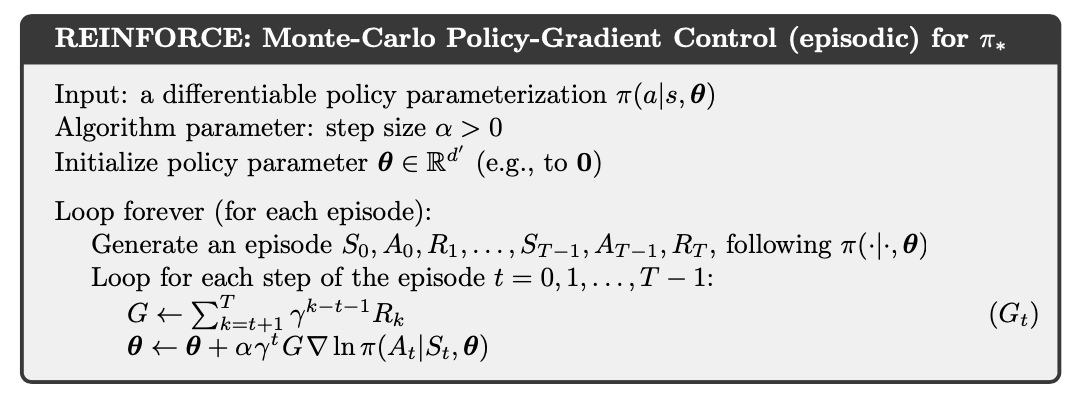

In [13]:
def compute_returns(rewards, discount_factor):
    """Compute discounted returns."""
    returns = np.zeros(len(rewards))
    returns[-1] = rewards[-1]
    for t in reversed(range(len(rewards)-1)):
        returns[t] = rewards[t] + discount_factor * returns[t+1]
    return returns

In [14]:
def REINFORCE(episodes=5000): 
    
    def compute_loss(a_probs, returns):
        return -torch.mean(torch.matmul(torch.log(a_probs), torch.from_numpy(returns).float()))
    
    # First sample a lot of episode
    max_length_episode = 500
    
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.005)
    
    s = env.reset()
    losses= list()
    total_ret = list()
    for i in range(episodes):
        s = env.reset()
        sars = list()
        optimizer.zero_grad()
        for j in range(max_length_episode): 
            logs = model(torch.tensor([s], dtype=torch.float))
            a = torch.multinomial(logs, 1).item()
            s1, r, done, _ = env.step(a)
            sars.append((s, a, r))
            #print(sars[-1])
            s = s1
            if done: 
                break
        #print(f"Episode: {i}: sars {sars}")
        sars = np.array(sars)
        states = np.vstack(sars[:, 0])
        actions = np.vstack(sars[:, 1])     
        rewards = np.array(sars[:,2], dtype=float)
        returns = compute_returns(rewards, 1.0)
        a_probs = model(torch.from_numpy(states).float()).gather(1, torch.from_numpy(actions)).view(-1)
        loss = compute_loss(a_probs, returns)
        #print(loss)
        losses.append(loss.item())
        total_ret.append(returns[0])
        loss.backward()
        optimizer.step()
            
        if i % 100 == 0: 
            print(f"Loss: {loss.item()}")
            print(f"Return: {returns[0]}")
    
    return total_ret, losses
        #print(actions)
        #print(model(torch.tensor(s, dtype=torch.float)).gather(1, torch.from_numpy(actions)).view(-1))
r, l = REINFORCE()



<ipython-input-14-832687ef0231>:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  sars = np.array(sars)


Loss: 90.73143005371094
Return: 16.0
Loss: 11214.248046875
Return: 200.0
Loss: 3066.31884765625
Return: 200.0
Loss: 1968.902099609375
Return: 168.0
Loss: 333.6719055175781
Return: 93.0
Loss: 441.66253662109375
Return: 99.0
Loss: 247.07241821289062
Return: 94.0
Loss: 808.4732666015625
Return: 115.0
Loss: 342.1591796875
Return: 91.0


KeyboardInterrupt: 

In [ ]:
actions = model(torch.tensor(env.reset(), dtype=torch.float))
print(actions)
a = torch.multinomial(actions, 1)
print(a)

In [ ]:
policy(torch.from_numpy(states).float()).gather(1, torch.from_numpy(actions)).view(-1)

In [ ]:
test_raw = test

In [167]:
test = np.array(test)

In [176]:
s = np.vstack(test[:,0])

In [178]:
torch.from_numpy(s).shape

torch.Size([13, 4])

In [15]:
s = env.reset()

try:
    for _ in range(50000):
        env.render()
        time.sleep(.05)
        a = model(torch.from_numpy(np.atleast_2d(s)).float()).argmax().item()
        s, r, done, _ = env.step(a)
        if done:
            env.reset()
except KeyboardInterrupt:
    env.close()
    pass